In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #good visualizing
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

In [93]:
wine = pd.read_csv("winequality-red.csv",sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preparation

In [9]:
data = wine
data.columns = data.columns.str.replace(' ','_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

In [11]:
#Train and Test splitting of data     
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test

C:\Users\12619\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


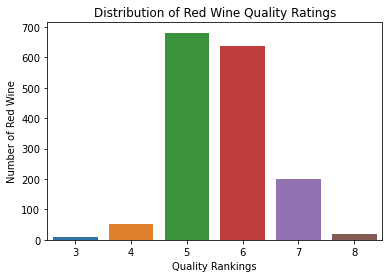

In [12]:
#How many wine quality number is realted with how many unique wines
#print(data['quality'].value_counts())
sns.barplot(data['quality'].unique(),data['quality'].value_counts())
plt.xlabel("Quality Rankings")
plt.ylabel("Number of Red Wine")
plt.title("Distribution of Red Wine Quality Ratings")
plt.show()

In [13]:
#Now seperate the dataset as response variable and feature variabes
X = data.drop(['quality'], axis = 1)
#y = pd.DataFrame(data['value'])
y = data['quality']

In [14]:
#Normalization
X_t = normalization(X)
print("X_t:", X_t.shape)

#Train and Test splitting of data 
x_train, x_test, y_train, y_test = train_test(X_t, y)

X_t: (1599, 11)
Train: 1119  - Test: 480


## Decision Trees

In [15]:
#decision trees default model and time
import time
start = time.time()
tree_model = DecisionTreeClassifier(random_state=1).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.023511171340942383


In [11]:
start = time.time()
tree_pred = tree_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.013426065444946289


In [12]:
score_train=tree_model.score(x_train,y_train)
score_test=tree_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  1.0 test score =  0.5583333333333333


In [30]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
            "min_samples_leaf": list(range(5,20,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_estimator_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)
print("------------------------------------------")

Best Parameters for Decision Tree:  DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)
Best Score for Decision Tree:  0.6086202754644459
------------------------------------------


In [31]:
#Apply cross validation to estimate the skills of models with 10 split with using best parameters
scores = cross_val_score(tree_clf, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")

Mean Accuracy of Cross Validation: % 60.78
Std of Accuracy of Cross Validation: % 4
------------------------------------------


C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [42]:
#Predict the test data as selected classifier
clf_prediction = tree_clf.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of decision trees:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of decision trees:\n", clf1_conf_matrix)
print("==========================================")

Accuracy of decision trees: 55.00000000000001
Confusion matrix of decision trees:
 [[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   0 128  65   2   0]
 [  0   0  66 123  11   0]
 [  0   0   2  46  13   0]
 [  0   0   0   4   2   0]]


In [44]:
start = time.time()
tree_model_prune = DecisionTreeClassifier(random_state=1,
                                   max_depth=4,
                                   min_samples_leaf=9).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('After pruning, train time =',time_train)

After pruning, train time = 0.01095271110534668


In [45]:
start = time.time()
tree_pred = tree_model_prune.predict(x_test)
end = time.time()
time_test = end-start
print('After pruning, test time =',time_test)

After pruning, test time = 0.01085662841796875


In [46]:
score_train=tree_model_prune.score(x_train,y_train)
score_test=tree_model_prune.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.6425379803395889 test score =  0.55


In [4]:
#Plotting the learning curve
# score curves, each time with 30% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

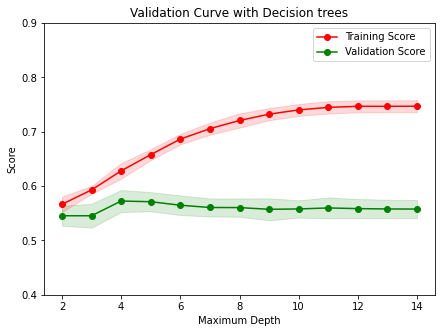

In [22]:
# Vary the max_depth parameter from 1 to 10
max_depth = np.arange(2,15,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(tree_model_prune, X, y, \
    param_name = "max_depth", param_range = max_depth, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(max_depth, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(max_depth, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.ylim([0.4,0.9])
plt.show()

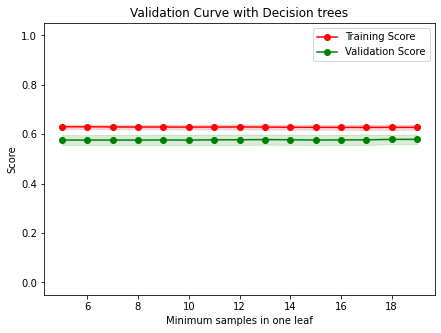

In [172]:
min_samples_leaf = np.arange(5,20,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(tree_model_prune, X, y, \
    param_name = "min_samples_leaf", param_range = min_samples_leaf, cv = cv)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Decision trees')
plt.plot(min_samples_leaf, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(min_samples_leaf, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(min_samples_leaf, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(min_samples_leaf, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
# Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Minimum samples in one leaf')
plt.ylabel('Score')
plt.ylim([-0.05,1.05])
plt.show()

Text(0.5, 1.0, 'Scalability of the model')

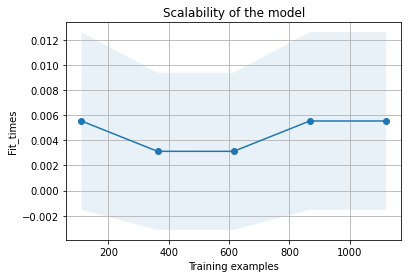

In [21]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(tree_model_prune, X_t, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the model")

Text(0.5, 1.0, 'Learning curve of Decision trees')

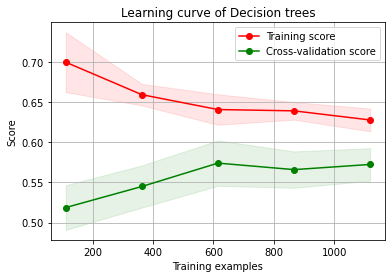

In [26]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Decision trees")

## Adaboost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
ada_boost = AdaBoostClassifier(tree_model_prune,random_state=1)
ada_boost.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.2586781978607178


In [27]:
start = time.time()
ada_pred = ada_boost.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.015480279922485352


In [28]:
score_train = ada_boost.score(x_train,y_train)
score_test = ada_boost.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.7006255585344057 test score =  0.5020833333333333


In [37]:
ada_params = {'n_estimators':range(50,500,50),"learning_rate": [1,0.1,0.01,0.001]}

grid_ada = GridSearchCV(ada_boost,ada_params,cv=cv) 
grid_ada.fit(x_train,y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.3, train_size=None),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                                min_samples_leaf=9,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [1, 0.1, 0.01, 0.001],
                         'n_estimators': range(50, 500, 50)})

In [38]:
# adaboost best estimator
ada_clf = grid_ada.best_estimator_
print("Best Parameters for AdaBoost Classifier: ", grid_ada.best_estimator_)
print("Best Score for AdaBoost Classifier: ", grid_ada.best_score_)
print("------------------------------------------")

Best Parameters for AdaBoost Classifier:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_leaf=9,
                                                         random_state=1),
                   learning_rate=0.001, n_estimators=450, random_state=1)
Best Score for AdaBoost Classifier:  0.605952380952381
------------------------------------------


In [39]:
scores = cross_val_score(ada_clf, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Mean Accuracy of Cross Validation: % 61.67
Std of Accuracy of Cross Validation: % 5
------------------------------------------


In [40]:
#Predict the test data as selected classifier
clf_prediction = ada_clf.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of Adaboost:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of Adaboost:\n", clf1_conf_matrix)
print("==========================================")

Accuracy of Adaboost: 57.70833333333333
Confusion matrix of Adaboost:
 [[  0   0   0   1   0   0]
 [  0   0   9   8   0   0]
 [  0   0 133  62   0   0]
 [  0   0  63 132   5   0]
 [  0   0   0  49  12   0]
 [  0   0   0   5   1   0]]


In [48]:
start = time.time()
ada_boost_grid = AdaBoostClassifier(tree_model_prune,random_state=1,n_estimators=400,learning_rate=0.001).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When n_estimators=400 and learning_rate=0.001, train time =',time_train)

When n_estimators=400 and learning_rate=0.001, train time = 1.9641423225402832


In [43]:
start = time.time()
ada_boost_grid_pred = ada_boost_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When n_estimators=400 and learning_rate=0.001, test time =',time_test)

When n_estimators=400 and learning_rate=0.001, test time = 0.08668065071105957


In [51]:
score_train = ada_boost_grid.score(x_train,y_train)
score_test = ada_boost_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.6818588025022342 test score =  0.575


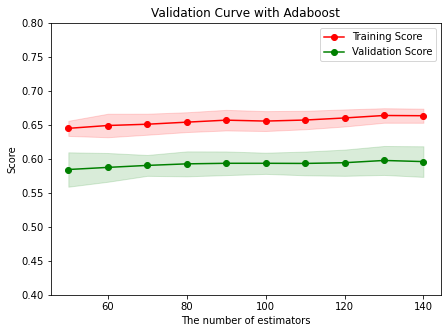

In [49]:
n_estimators = np.arange(300,500,10)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(ada_boost_grid, X, y, \
    param_name = "n_estimators", param_range = n_estimators, cv = cv)

# Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Adaboost')
plt.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(n_estimators, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(n_estimators, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(n_estimators, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
# Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('The number of estimators')
plt.ylabel('Score')
plt.ylim([0.4,0.8])
plt.show()

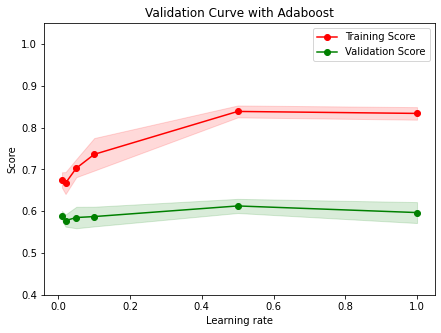

In [92]:
learning_rate = [1,0.5,0.1,0.05,0.02,0.01]

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(ada_boost_grid, X, y, \
    param_name = "learning_rate", param_range = learning_rate, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with Adaboost')
plt.plot(learning_rate, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(learning_rate, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(learning_rate, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(learning_rate, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('Learning rate')
plt.ylabel('Score')
plt.ylim([0.4,1.05])
plt.show()

Text(0.5, 1.0, 'Scalability of the Adaboost model')

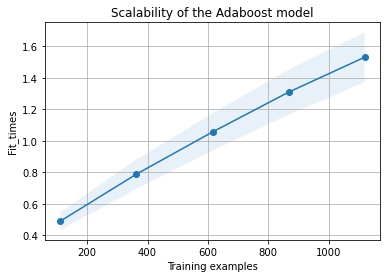

In [49]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(ada_boost_grid, X_t, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the Adaboost model")

Text(0.5, 1.0, 'Learning curve of Adaboost')

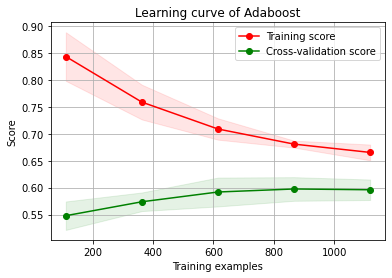

In [50]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Adaboost")

## Support Vector Machine

In [16]:
from sklearn.svm import SVC
start = time.time()
svm_model = SVC()
svm_model.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.07835602760314941


In [17]:
start = time.time()
svm_pred = svm_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.05829620361328125


In [18]:
score_train = svm_model.score(x_train,y_train)
score_test = svm_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.6747095621090259 test score =  0.60625


In [248]:
svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [249]:
svc = grid_svc.best_estimator_
print("Best Parameters for SVM: ", grid_svc.best_estimator_)
print("Best Score for SVM: ", grid_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  SVC(C=10.0)
Best Score for SVM:  0.6238308776425369
------------------------------------------


In [250]:
scores = cross_val_score(svc, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Mean Accuracy of Cross Validation: % 63.63
Std of Accuracy of Cross Validation: % 4
------------------------------------------


In [251]:
#Predict the test data as selected classifier
clf_prediction = svc.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of SVM:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of SVM:\n", clf1_conf_matrix)
print("==========================================")

Accuracy of SVM: 62.5
Confusion matrix of SVM:
 [[  0   0   1   0   0   0]
 [  0   1  12   4   0   0]
 [  1   1 149  41   3   0]
 [  0   0  59 125  15   1]
 [  0   0   0  35  25   1]
 [  0   0   0   2   4   0]]


In [19]:
start = time.time()
svm_grid = SVC(kernel="rbf",C=10.0).fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When kernel = rbf, C = 10, train time =',time_train)

When kernel = rbf, C = 10, train time = 0.08137655258178711


In [56]:
start = time.time()
svm_grid_pred = svm_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When kernel = rbf, C = 10, train time =',time_test)

When kernel = rbf, C = 10, train time = 0.0465548038482666


In [57]:
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.8060768543342269 test score =  0.625


In [21]:
svm_grid = SVC(kernel="poly",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.7605004468275246 test score =  0.58125


In [22]:
svm_grid = SVC(kernel="sigmoid",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.4879356568364611 test score =  0.42916666666666664


In [23]:
svm_grid = SVC(kernel="linear",C=10.0).fit(x_train,y_train)
score_train = svm_grid.score(x_train,y_train)
score_test = svm_grid.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.6014298480786416 test score =  0.5604166666666667


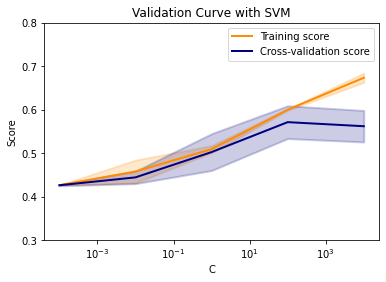

In [254]:
param_range = np.logspace(-4, 4, 5)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(
    svm_grid, X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.3, 0.8)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Text(0.5, 1.0, 'Performance of the model')

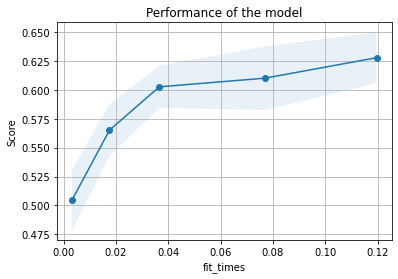

In [20]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(svm_grid, X_t, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(fit_times_mean, test_scores_mean, 'o-')
plt.fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel("fit_times")
plt.ylabel("Score")
plt.title("Performance of the model")

## K nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
end = time.time()
time_train = end-start
print('train time =',time_train)

train time = 0.015082120895385742


In [25]:
start = time.time()
knn_pred = knn_model.predict(x_test)
end = time.time()
time_test = end-start
print('test time =',time_test)

test time = 0.029422283172607422


In [26]:
score_train = knn_model.score(x_train,y_train)
score_test = knn_model.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.7050938337801609 test score =  0.5708333333333333


In [82]:
knn_params = {'n_neighbors':list(range(2,15,1)),'weights': ['disdance', 'uniform']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(x_train, y_train)

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\base.py", line 500, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 206, in predict
    weights = _get_weights(neigh_dist, self.weights)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 111, in _get_weights
    raise 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14],
                         'weights': ['disdance', 'uniform']})

In [83]:
knn = grid_knn.best_estimator_
print("Best Parameters for KNN: ", grid_knn.best_estimator_)
print("Best Score for KNN: ", grid_knn.best_score_)
print("------------------------------------------")

Best Parameters for KNN:  KNeighborsClassifier(n_neighbors=11)
Best Score for KNN:  0.5987748238308777
------------------------------------------


In [58]:
scores = cross_val_score(knn, x_train, y_train, cv=10)
print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
print("------------------------------------------")

Mean Accuracy of Cross Validation: % 59.88
Std of Accuracy of Cross Validation: % 3
------------------------------------------


C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [59]:
#Predict the test data as selected classifier
clf_prediction = knn.predict(x_test)
clf1_accuracy = sum(y_test == clf_prediction)/len(y_test)
print("Accuracy of KNN:",clf1_accuracy*100)

#print confusion matrix and accuracy score before best parameters
clf1_conf_matrix = confusion_matrix(y_test, clf_prediction)
print("Confusion matrix of KNN:\n", clf1_conf_matrix)
print("==========================================")

Accuracy of KNN: 56.458333333333336
Confusion matrix of KNN:
 [[  0   0   0   1   0   0]
 [  0   0   7  10   0   0]
 [  0   0 131  61   3   0]
 [  0   0  67 119  14   0]
 [  0   0   5  35  21   0]
 [  0   0   1   2   3   0]]


In [85]:
start = time.time()
knn_grid = KNeighborsClassifier(n_neighbors=11,weights='uniform').fit(x_train,y_train)
end = time.time()
time_train = end-start
print('When n_neighbors=11, weights = uniform, train time =',time_train)

When n_neighbors=11, weights = uniform, train time = 0.008005380630493164


In [66]:
start = time.time()
knn_grid_pred = knn_grid.predict(x_test)
end = time.time()
time_test = end-start
print('When n_neighbors=11, weights = uniform, test time =',time_test)

When n_neighbors=11, weights = uniform, test time = 0.03200411796569824


In [67]:
score_train = grid_knn.score(x_train,y_train)
score_test = grid_knn.score(x_test,y_test)
print('training score = ',score_train,'test score = ',score_test)

training score =  0.6595174262734584 test score =  0.5645833333333333


C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\Users\12619\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\12619\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

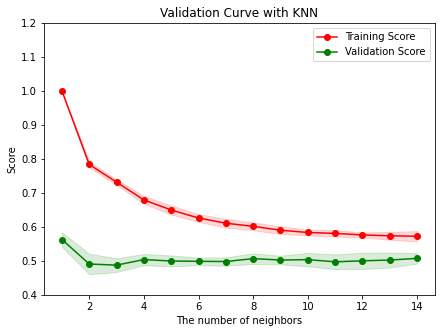

In [86]:
n_neighbors = np.arange(0,15,1)

# Calculate the training and testing scores
train_scores, test_scores = validation_curve(knn_grid, X, y, \
    param_name = "n_neighbors", param_range = n_neighbors, cv = cv)

    # Find the mean and standard deviation for smoothing
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
plt.figure(figsize=(7, 5))
plt.title('Validation Curve with KNN')
plt.plot(n_neighbors, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(n_neighbors, test_mean, 'o-', color = 'g', label = 'Validation Score')
plt.fill_between(n_neighbors, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(n_neighbors, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')
    
 # Visual aesthetics
plt.legend(loc = 'best')
plt.xlabel('The number of neighbors')
plt.ylabel('Score')
plt.ylim([0.4,1.2])
plt.show()

Text(0.5, 1.0, 'Scalability of the KNN model')

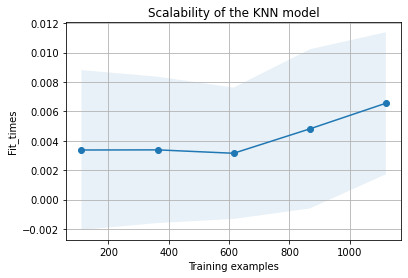

In [74]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(knn_grid, X_t, y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.plot(train_sizes, fit_times_mean, 'o-')
plt.fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
plt.xlabel("Training examples")
plt.ylabel("Fit_times")
plt.title("Scalability of the KNN model")

Text(0.5, 1.0, 'Learning curve of KNN')

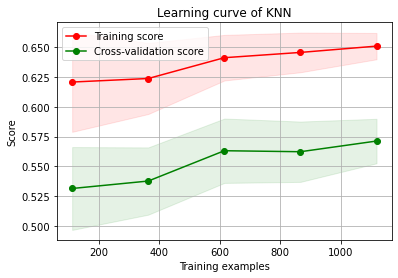

In [75]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of KNN")